<a href="https://colab.research.google.com/github/NguyenMinhThangNMT/HomeWorks/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Tiền xử lí dữ liệu
#1.Tải và đọc tập tin
import numpy as np
from keras.datasets import cifar100
(X_train,y_train),(X_test,y_test)=cifar100.load_data()
np.random.seed(10)
print('số ảnh dùng để train:',len(X_train))
print('số ảnh dùng để tét:',len(X_test))
print('Kích cỡ ảnh train:',X_train.shape)
print('Kích cỡ ảnh label:',y_train.shape)
print('Kích cỡ ảnh test:',X_test.shape)
print('Kích cỡ ảnh test_label:',y_test.shape)

169001437/169001437 [==============================] - 2s 0us/step
số ảnh dùng để train: 50000
số ảnh dùng để tét: 10000
Kích cỡ ảnh train: (50000, 32, 32, 3)
Kích cỡ ảnh label: (50000, 1)
Kích cỡ ảnh test: (10000, 32, 32, 3)
Kích cỡ ảnh test_label: (10000, 1)


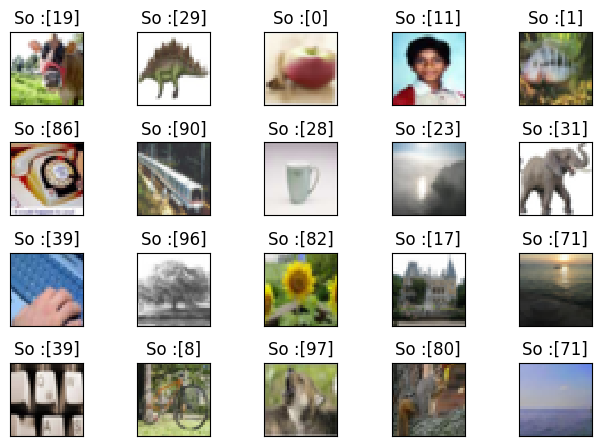

In [2]:
#12 Show 1 phần của tập train
import matplotlib.pyplot as plt

for i in range(20): #Hiển thị 20 tấm hình
  plt.subplot(4,5,i+1) #4 Hàng và 5 CộtCột
  plt.tight_layout()
  plt.imshow(X_train[i], cmap= 'binary', interpolation= 'none')#Cmap là nahr xạ dữ liệu vô hướng với màu sắc.Ở đây là màu xámxám
  plt.title("So " ":{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [7]:
#1.3 Chuẩn hóa hình ảnh:đưa chia cho 255 để về giảm tải dữ liệu
X_train = X_train.reshape((50000, 32,32,3))
X_train_normalize=X_train.astype('float32')/255.0

X_test = X_test.reshape((10000, 32,32,3))
X_test_normalize=X_test.astype('float32')/255.0



[255 255 255]
[1. 1. 1.]


In [9]:
from keras.utils import np_utils
#1.4 Chuẩn hóa OneHot để chuyển tên hình thành matrix
y_train_OneHot=np_utils.to_categorical(y_train,100)
y_test_OneHot=np_utils.to_categorical(y_test,100)
print(y_train_OneHot.shape)


(50000, 100)


In [25]:
from keras.backend import categorical_crossentropy
from keras.models import Sequential,Model
from keras.layers import Input,Dense,Flatten,Conv2D,MaxPooling2D,Normalization
from keras.layers import LeakyReLU
from keras.optimizers import Adam

batch_size = 64
epoch = 20
classes = 100

model=Sequential()
model.add(Conv2D(32, kernel_size= (3,3), activation= 'linear', input_shape= (32,32,3), padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))
model.add(Conv2D(64, (3,3), activation= 'linear', padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))
model.add(Conv2D(128, (3,3), activation= 'linear', padding= 'same'))
model.add(LeakyReLU(alpha= 1))
model.add(MaxPooling2D((2,2), padding= 'same'))


#Xây dựng mang noron(Lớp phẳng,lớp ẩn, đầu ra)
model.add(Flatten())
model.add(Dense(128, activation= 'linear'))
model.add(LeakyReLU(alpha= 0.1))
model.add(Dense(classes, activation= 'softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

In [30]:
from keras.backend import categorical_crossentropy
model.compile(loss= categorical_crossentropy, optimizer= Adam(), metrics= ['accuracy'])
train = model.fit(X_train_normalize, y_train_OneHot, batch_size= 64, epochs= 20, verbose= 1)



Epoch 1/20
782/782 [==============================] - 4s 5ms/step - loss: 0.2059 - accuracy: 0.9351
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1812 - accuracy: 0.9434
Epoch 3/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1827 - accuracy: 0.9437
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1746 - accuracy: 0.9463
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1797 - accuracy: 0.9448
Epoch 6/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1959 - accuracy: 0.9409
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1760 - accuracy: 0.9464
Epoch 8/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1774 - accuracy: 0.9460
Epoch 9/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1678 - accuracy: 0.9490
Epoch 10/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1808 - accuracy: 0.9472

In [36]:
test_loss, test_acc = model.evaluate(X_train_normalize,y_train_OneHot)
print("Accurency:", test_acc)
print('Loss:', test_loss)
model.save('/content/drive/MyDrive/Mon AI/CIFAR100_CNN.h5')

1563/1563 [==============================] - 6s 4ms/step - loss: 0.1173 - accuracy: 0.9661
Accurency: 0.9660599827766418
Loss: 0.11728420108556747


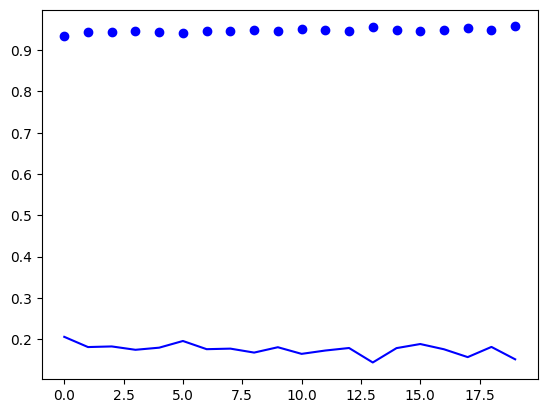

In [33]:
accuracy=train.history['accuracy']
loss=train.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Training accuracy')
plt.plot(epochs,loss,'b',label='Training loss')
plt.show()

In [37]:
from keras.models import load_model
model100 = load_model('/content/drive/MyDrive/Mon AI/CIFAR100_CNN.h5')

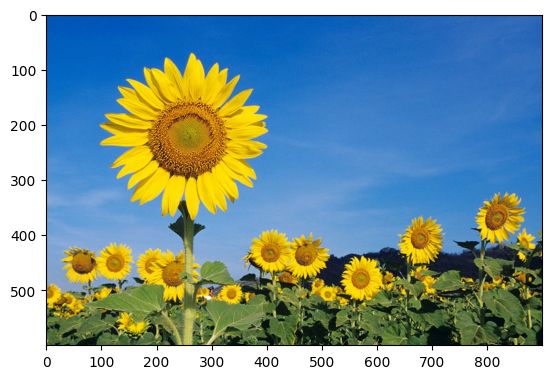

In [45]:

from keras.utils import load_img, img_to_array
from matplotlib import pyplot as plt
url = '/content/drive/MyDrive/ANH AI/Sunflower.jpeg'
img = load_img(url)
plt.imshow(img)
plt.show()

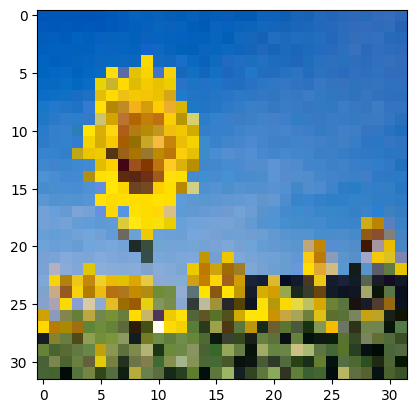

In [46]:
img = load_img(url, target_size= (32,32,3))
plt.imshow(img)

In [47]:
img = img_to_array(img)
img = img.reshape(1,32,32,3)
img = img.astype('float32')/255

import numpy as np
np.argmax(model100.predict(img), axis = 1)

1/1 [==============================] - 0s 23ms/step


array([82])